# Основы визуализации данных с помощью Matplotlib

## Домашнее задание 

### Цель домашнего задания

Отработать навык визуализации данных с помощью простых графиков matplotlib. Научиться использовать визуализацию данных для проверки гипотез и валидации данных.

### Описание домашнего задания и формат сдачи

Вам предстоит выполнить задачи по визуализации данных. Для этого  впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку преподавателю.

**Важно учесть:** У всех графиков обязательно должен присутствовать заголовок и подписи осей. Убедитесь, что все метки и подписи осей читаемы.

#### Описание данных

Для выполнения домашнего задания необходимо использовать датасет `vgsales.csv`, загрузка которого будет приведена ниже. Этот датасет содержит информацию о суммарных продажах видеоигр для игровых консолей. Описание признаков:
* `Rank` – порядковый номер записи в датасете
* `Name` – наименование игры
* `Platform` – платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и др.)
* `Year` – год выпуска игры
* `Genre` – жанр игры
* `Publisher` – наименование компании-издателя игры
* `NA_Sales` – объем продаж игры в Северной Америке, млн. копий
* `EU_Sales` – объем продаж игры в Европе, млн. копий
* `JP_Sales` – объем продаж игры в Японии, млн. копий
* `Other_Sales` – объем продаж игры в остальных странах, млн. копий
* `Global_Sales` – объем продаж игры по всему миру, млн. копий

### Критерии оценки

**Зачет** – выполнены задачи 1-9, каждый график отформатирован и читаем

**На доработку** – выполнены не все обязательные задачи или какой-либо из графиков не читаем или не подписан

### Рекомендации по выполнению

* Библиотеки, необходимые для выполнения домашнего задания, перечислены в ячейке ниже.
* Подсказка по работе с Jupyter: если перед графиком выводится слишком много текста, поставьте ';' в конце последней строки ячейки.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.style import available
import numpy as np

### Загрузка данных

In [6]:
df = pd.read_csv('vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


### Подготовка 

In [15]:
def setup_draw(ax, limx=(0, 5), xstep=1, limy=(0, 10), ystep=1, minor=True):
    
    """Set up common parameters for the Axes."""
    
    # set background color
    ax.set_facecolor("lavender")
    
    # only show the left and bottom spines
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.tick_params(top=False)

    # define tick positions
    ax.xaxis.set_major_locator(ticker.MultipleLocator(xstep))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(ystep))
    
    if minor:
        ax.xaxis.set_minor_locator(ticker.MultipleLocator(round(xstep/5, 2)))
        ax.yaxis.set_minor_locator(ticker.MultipleLocator(round(ystep/5, 2)))

    ax.tick_params(which='major', top=False, right=False, width=1.00, length=5)
    
    if minor:
        ax.tick_params(which='minor', top=False, right=False, width=0.75, length=2.5, labelsize=10)

    ax.set_xlim(limx[0], limx[1])
    ax.set_ylim(limy[0], limy[1])

### Задача 1

Постройте гистограмму распределения объема продаж всех игр в Японии.

<ipython-input-312-56f50afca302>:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


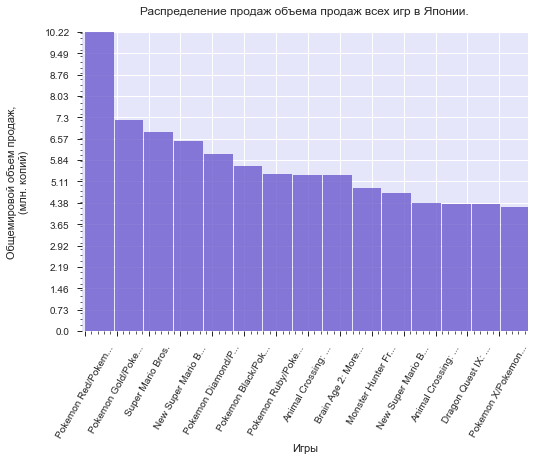

In [312]:
# Параметры диаграммы
series = df[['Name', 'JP_Sales']].round(2).sort_values('JP_Sales', ascending=False)

bins_nbr = 15
labelx_len = 17
labely_format = '{:,.0f}'

x_range = series['Name'][:bins_nbr]
y_range = series['JP_Sales'][:bins_nbr]

x_positions = [''.join([each[:labelx_len], '...'] if len(each) > labelx_len else each) for each in x_range]
y_positions = list(np.linspace(y_range.max(), 0, bins_nbr).round(2))

# Тема и инициализация
plt.style.use('seaborn')
fig, ax = plt.subplots()

# Заголовки
ax.set_title('Распределение продаж объема продаж всех игр в Японии.\n')
ax.set_ylabel('Общемировой объем продаж,\n(млн. копий)\n')
ax.set_xlabel('Игры')

# Оси и подписи
setup_draw(ax, limx=(-0.1, bins_nbr - 1.1), limy=(0, max(y_positions)))

ax.xaxis.set_major_locator(ticker.FixedLocator([i for i in range(0, len(x_positions))]))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(x_positions))
ax.yaxis.set_major_locator(ticker.FixedLocator(y_positions))
ax.yaxis.set_major_formatter(ticker.FixedFormatter(y_positions))
ax.set_xticklabels(x_positions, rotation=60, ha='center')

# Создание визуализации и отрисовка
ax.hist(x_range, bins=bins_nbr, alpha=0.8, width=0.9, weights=y_range, orientation='vertical', color='slateblue')
fig.show()

### Задача 2

Постройте столбчатую диаграмму (barchart), показывающую сравнение общемирового объема продаж игры "Grand Theft Auto V" на разных платформах.

16       PS3
23      X360
44       PS4
197     XOne
1896      PC
Name: Platform, dtype: object


<ipython-input-302-182c7aa5fe4b>:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


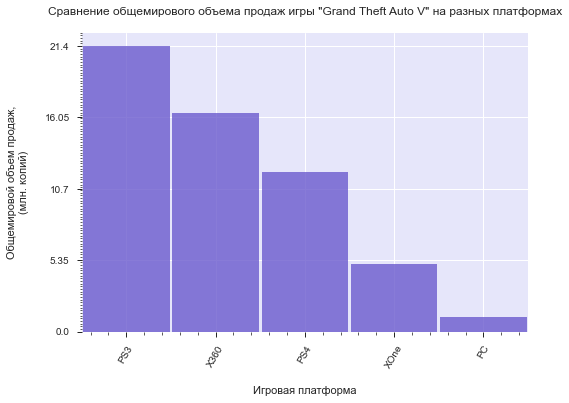

In [302]:
# Параметры диаграммы
series = df[df['Name'] == 'Grand Theft Auto V'][['Platform', 'Global_Sales']]

x_range = series['Platform']
y_range = series['Global_Sales']
bins_nbr = len(y_range)
label_len = 15
x_positions = [i for i in range(0, len(x_positions))]
y_positions = list(np.linspace(y_range.max(), 0, bins_nbr).round(2))
x_label = x_range
print(x_label)

# Тема и инициализация
plt.style.use('seaborn')
fig, ax = plt.subplots()

# Заголовки
ax.set_title('Сравнение общемирового объема продаж игры "Grand Theft Auto V" на разных платформах\n')
ax.set_ylabel('Общемировой объем продаж,\n(млн. копий)\n')
ax.set_xlabel('\nИгровая платформа')

# Оси и подписи
setup_draw(ax, limx=(-0.5, bins_nbr - 0.5), limy=(min(y_positions), max(y_positions) + 1))

ax.xaxis.set_major_locator(ticker.FixedLocator(x_positions))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(x_range))
ax.yaxis.set_major_locator(ticker.FixedLocator(y_positions))
ax.yaxis.set_major_formatter(ticker.FixedFormatter(y_positions))
ax.set_xticklabels(x_label, rotation=60, ha='center')

# Создание визуализации и отрисовка
ax.bar(x_range, height=y_range, alpha=0.8, width=0.97, color='slateblue')
fig.show()


<ipython-input-510-4619e6625d8c>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_positions, rotation=60, ha='center')
<ipython-input-510-4619e6625d8c>:32: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


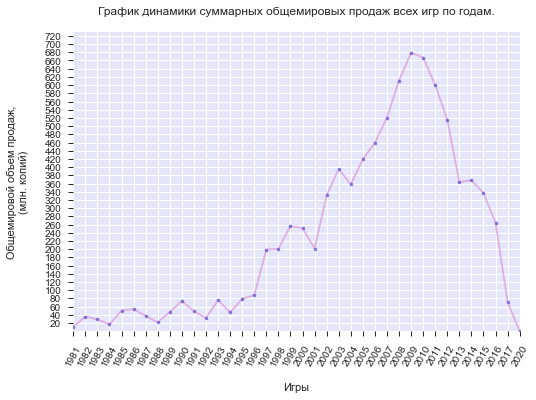

In [510]:
# Параметры диаграммы
series = df.groupby('Year')['Global_Sales'].agg('sum')

x_range = series.index.astype(int)
y_range = series.round(2)
bins_nbr = len(y_range)
label_len = 15

x_positions = x_range
y_positions = y_range

# Тема и инициализация
plt.style.use('seaborn')
fig, ax = plt.subplots()

# Заголовки
ax.set_title('График динамики суммарных общемировых продаж всех игр по годам.\n')
ax.set_ylabel('Общемировой объем продаж,\n(млн. копий)\n')
ax.set_xlabel('\nИгры')

# Оси и подписи
setup_draw(ax, limx=(min(x_positions), max(x_positions)-3), limy=(min(y_positions), max(y_positions)+50), ystep=20, minor=False)

# ax.xaxis.set_major_locator(ticker.FixedLocator(x_positions))
# ax.xaxis.set_major_formatter(ticker.FixedFormatter(x_positions))
# ax.yaxis.set_major_locator(ticker.FixedLocator(y_positions))
# ax.yaxis.set_major_formatter(ticker.FixedFormatter(y_positions))
ax.set_xticklabels(x_positions, rotation=60, ha='center')

# Создание визуализации и отрисовка
ax.plot(x_range, y_range, alpha=0.8, color='plum', marker='.', markerfacecolor='slateblue')
fig.show()

### Задача 4

Постройте точечную диаграмму, показывающую существование зависимости продаж во всем мире от продаж в Северной Америке.

<ipython-input-231-b9bdf294f3ce>:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


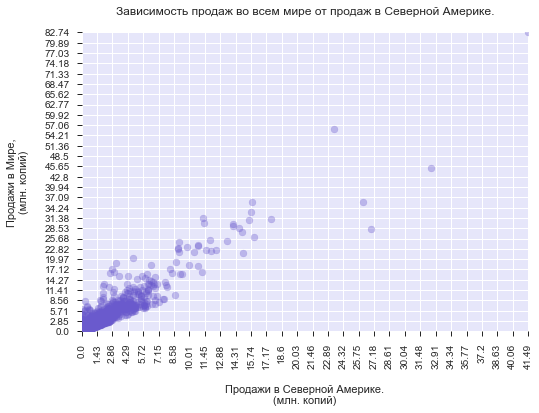

In [231]:
# Параметры диаграммы
series = df.groupby('Name')[['NA_Sales', 'Global_Sales']].agg(sum).round(2)

x_range = series['NA_Sales']
y_range = series['Global_Sales']
bins_nbr = 30
label_len = 15

x_positions = list(np.linspace(x_range.max(), 0, bins_nbr).round(2))
y_positions = list(np.linspace(y_range.max(), 0, bins_nbr).round(2))

x_label = list(np.linspace(x_range.max(), 0, bins_nbr).round(2))
y_label = list(np.linspace(y_range.max(), 0, bins_nbr).round(2))

# Тема и инициализация
plt.style.use('seaborn')
fig, ax = plt.subplots()

# Заголовки
ax.set_title('Зависимость продаж во всем мире от продаж в Северной Америке.\n')
ax.set_ylabel('Продажи в Мире,\n(млн. копий)\n')
ax.set_xlabel('\nПродажи в Северной Америке.\n(млн. копий)')

# Оси и подписи
setup_draw(ax, limx=(0, max(x_positions)), xstep=3, limy=(0, max(y_positions)), ystep=3, minor=False)

ax.xaxis.set_major_locator(ticker.FixedLocator(x_positions))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(x_positions))
ax.yaxis.set_major_locator(ticker.FixedLocator(y_positions))
ax.yaxis.set_major_formatter(ticker.FixedFormatter(y_positions))
ax.set_xticklabels(x_positions, rotation=90, ha='center')

# Создание визуализации и отрисовка
ax.scatter(x_range, y_range, alpha=0.35, color='slateblue')
fig.show()

### Задача 5

Постройте круговую диаграмму процентного соотношения продаж игры "Super Mario Bros." на разных платформах во всем мире. Подпишите доли графика с точностью 1 знак после запятой.

<ipython-input-377-c9dadf3b23a6>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


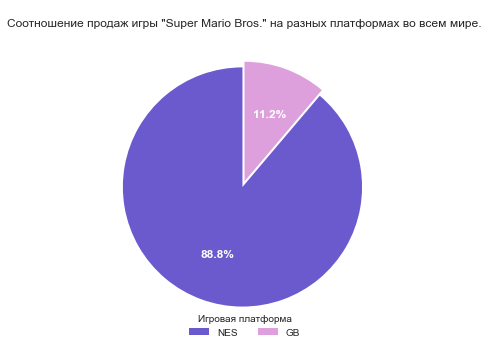

In [377]:
df[df['Name'] == 'Super Mario Bros.']['Platform']

series = df.groupby('Name')[['NA_Sales', 'Global_Sales']].agg(sum).round(2)

x_range = df[df['Name'] == 'Super Mario Bros.']['Platform'].tolist()
y_range = df[df['Name'] == 'Super Mario Bros.']['Global_Sales'].tolist()
bins_nbr = 30
label_len = 15

# Тема и инициализация
plt.style.use('seaborn')
fig, ax = plt.subplots()

# Заголовки и легенда
ax.set_title('\nСоотношение продаж игры "Super Mario Bros." на разных платформах во всем мире.')

# Создание визуализации и отрисовка
ax.pie(y_range, labels=None, autopct='%1.1f%%', explode=(0.05, 0), colors=('slateblue', 'plum'),
        shadow=False, startangle=90, textprops={'size': 12, 'color': 'white', 'weight': 'bold'})
plt.legend(x_range[::], loc='lower center', bbox_to_anchor=(0.5, -0.05, 0, 0), title='Игровая платформа', ncol=2)
fig.show()

### Задача 6

Определите 5 издателей, имеющих наибольшие суммарные продажи во всём мире в 2013 году, и проиллюстрируйте величину их продаж на столбчатой диаграмме.

<ipython-input-313-fa1793b246cc>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


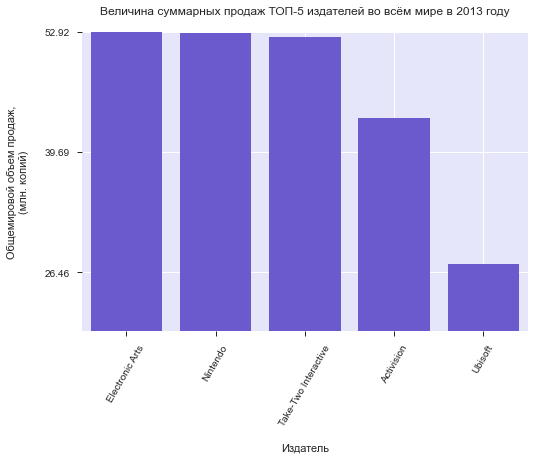

In [313]:
# Параметры диаграммы
series = df[df['Year'] == 2013].groupby('Publisher').agg(sum).sort_values('Global_Sales', ascending=False).head()

x_range = series.index.tolist()
y_range = series['Global_Sales'].round(2).tolist()

bins_nbr = len(y_range)
label_len = 15

x_positions = x_range
y_positions = list(np.linspace(max(y_range), 0, bins_nbr).round(2))

x_label = x_range
y_label = y_positions

# Тема и инициализация
plt.style.use('seaborn')
fig, ax = plt.subplots()

# Заголовки
ax.set_title('Величина суммарных продаж ТОП-5 издателей во всём мире в 2013 году\n')
ax.set_ylabel('Общемировой объем продаж,\n(млн. копий)\n')
ax.set_xlabel('\nИздатель')

# Оси и подписи
setup_draw(ax, limx=(-0.5, bins_nbr-0.5), limy=(20., max(y_positions)), minor=False)

ax.xaxis.set_major_locator(ticker.FixedLocator([i for i in range(len(x_positions))]))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(x_label))
ax.yaxis.set_major_locator(ticker.FixedLocator(y_positions))
ax.yaxis.set_major_formatter(ticker.FixedFormatter(y_label))
ax.set_xticklabels(x_positions, rotation=60, ha='center')

# Создание визуализации и отрисовка
ax.bar(x_range, height=y_range, color='slateblue')
fig.show()


### Задача 7

Постройте гистограмму распределения величины общемировых продаж игр, выпущенных не издателем Nintendo, в период с 2000 по 2015 год включительно. Гистограмма для большей точности должна содержать 20 столбцов, отсечки на оси X должны соответствовать границам столбцов.

<ipython-input-434-d4e3afe64890>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


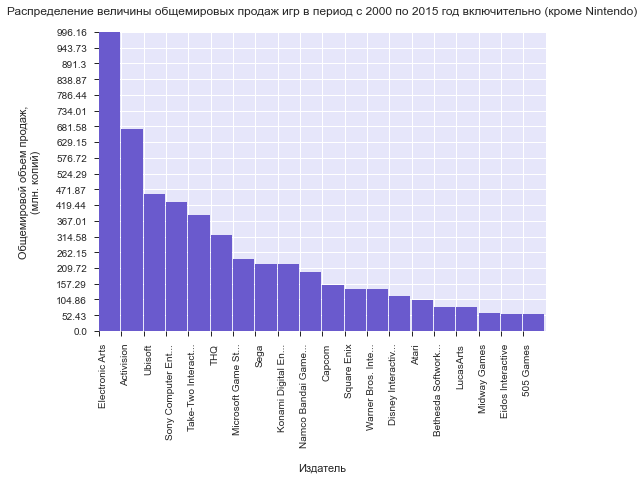

In [434]:
# Параметры диаграммы
series = df[(df['Publisher'] != 'Nintendo') & ((df['Year'] >= 2000) & (df['Year'] <= 2015))].groupby('Publisher').agg(sum)

x_range = series.sort_values('Global_Sales', ascending=False).index.tolist()
y_range = series.sort_values('Global_Sales', ascending=False)['Global_Sales'].round(2).tolist()

bins_nbr = 20
labelx_len = 17

x_positions = x_range[:bins_nbr]
y_positions = list(np.linspace(max(y_range), 0, bins_nbr).round(2))

x_labels = [''.join([each[:labelx_len], '...'] if len(each) > labelx_len else each) for each in x_positions]
y_labels = y_positions

# Тема и инициализация
plt.style.use('seaborn')
fig, ax = plt.subplots()

# Заголовки
ax.set_title('Распределение величины общемировых продаж игр в период с 2000 по 2015 год включительно (кроме Nintendo)\n')
ax.set_ylabel('Общемировой объем продаж,\n(млн. копий)\n')
ax.set_xlabel('\nИздатель')

# Оси и подписи
setup_draw(ax, limx=(0, bins_nbr), limy=(min(y_positions), max(y_positions)), minor=False)

ax.xaxis.set_major_locator(ticker.FixedLocator([i for i in range(len(x_positions))]))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(x_labels))
ax.yaxis.set_major_locator(ticker.FixedLocator(y_positions))
ax.yaxis.set_major_formatter(ticker.FixedFormatter(y_labels))
ax.set_xticklabels(x_labels, rotation=90, ha='left')

# Создание визуализации и отрисовка
ax.bar(x_range, width=0.95, height=y_range, color='slateblue', align='edge')
fig.show()

### Задача 8

Постройте линейный график динамики суммарных мировых продаж игр жанра "Action" по годам.

In [436]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [475]:
series = df[['Genre', 'Year', 'Global_Sales']].loc[df['Genre'] == 'Action'].groupby('Year')['Global_Sales'].agg('sum')
series.head()

Year
1980.0     0.34
1981.0    14.84
1982.0     6.52
1983.0     2.86
1984.0     1.85
Name: Global_Sales, dtype: float64

<ipython-input-511-b36b626859e0>:32: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


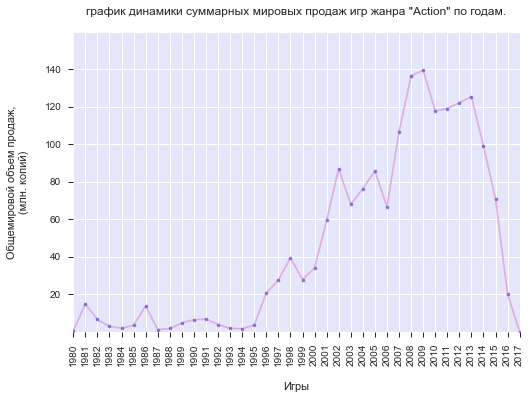

In [511]:
# Параметры диаграммы
series = df[['Genre', 'Year', 'Global_Sales']].loc[df['Genre'] == 'Action'].groupby('Year')['Global_Sales'].agg('sum')

x_range = series.index.astype(int)
y_range = series.round(2)
bins_nbr = len(y_range)
label_len = 15

x_positions = x_range
y_positions = y_range

# Тема и инициализация
plt.style.use('seaborn')
fig, ax = plt.subplots()

# Заголовки
ax.set_title('график динамики суммарных мировых продаж игр жанра "Action" по годам.\n')
ax.set_ylabel('Общемировой объем продаж,\n(млн. копий)\n')
ax.set_xlabel('\nИгры')

# Оси и подписи
setup_draw(ax, limx=(min(x_positions), max(x_positions)), limy=(min(y_positions), max(y_positions)+20), ystep=20, minor=False)

ax.xaxis.set_major_locator(ticker.FixedLocator(x_positions))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(x_positions))
# ax.yaxis.set_major_locator(ticker.FixedLocator(y_positions))
# ax.yaxis.set_major_formatter(ticker.FixedFormatter(y_positions))
ax.set_xticklabels(x_positions, rotation=90, ha='center')

# Создание визуализации и отрисовка
ax.plot(x_range, y_range, alpha=0.8, color='plum', marker='.', markerfacecolor='slateblue')
fig.show()

### Задача 9

С помощью столбчатой диаграммы проиллюстрируйте объем продаж всех игр издателя "Microsoft Game Studios" в Северной Америке за все время в зависимости от жанра. Столбцы расположите по убыванию.

<ipython-input-508-e865129ed8ae>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


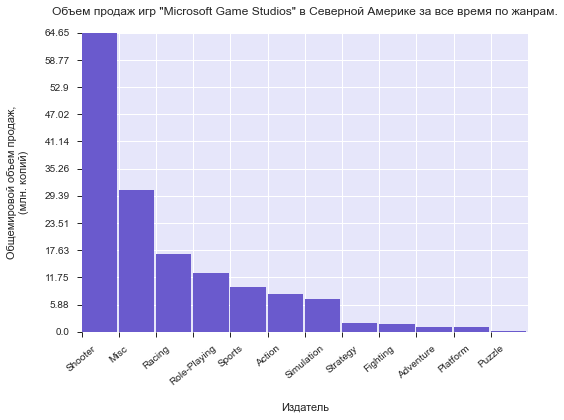

In [508]:
# Параметры диаграммы
series = df[['Genre', 'NA_Sales']].loc[df['Publisher'] == 'Microsoft Game Studios'].groupby('Genre').agg('sum').sort_values('NA_Sales', ascending=False)

x_range = series.sort_values('NA_Sales', ascending=False).index.tolist()
y_range = series.sort_values('NA_Sales', ascending=False)['NA_Sales'].round(2).tolist()

bins_nbr = len(x_range)
labelx_len = 17

x_positions = x_range[:bins_nbr]
y_positions = list(np.linspace(max(y_range), 0, bins_nbr).round(2))

x_labels = [''.join([each[:labelx_len], '...'] if len(each) > labelx_len else each) for each in x_positions]
y_labels = y_positions

# Тема и инициализация
plt.style.use('seaborn')
fig, ax = plt.subplots()

# Заголовки
ax.set_title('Объем продаж игр "Microsoft Game Studios" в Северной Америке за все время по жанрам.\n')
ax.set_ylabel('Общемировой объем продаж,\n(млн. копий)\n')
ax.set_xlabel('\nИздатель')

# Оси и подписи
setup_draw(ax, limx=(0, bins_nbr), limy=(min(y_positions), max(y_positions)), minor=False)

ax.xaxis.set_major_locator(ticker.FixedLocator([i for i in range(len(x_positions))]))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(x_labels))
ax.yaxis.set_major_locator(ticker.FixedLocator(y_positions))
ax.yaxis.set_major_formatter(ticker.FixedFormatter(y_labels))
ax.set_xticklabels(x_labels, rotation=40, ha='center')

# Создание визуализации и отрисовка
ax.bar(x_range, width=0.95, height=y_range, color='slateblue', align='edge')
fig.show()

## Дополнительные (необязательные) задачи

### Задача 10

Одной из основных задач при анализе данных является проверка данных на корректность и отсутствие ошибок. В датасете "vgsales" одним из потенциальных источников ошибок является столбец с общемировыми продажами. По идее, значение общемировых продаж какой-либо игры должно равняться сумме продаж в Северной Америке, Европе, Японии и остальных странах, в противном случае мы получим ошибку в данных, которая может негативно повлиять на весь дальнейший процесс анализа.

Причин возникновения такой ошибки может быть несколько. Давайте рассмотрим следующие причины:
1. Ошибка округления. В целом, такая ошибка достаточно часто встречается при переводе величин из одних единиц в другие (например, из тысяч копий в миллионы копий).
1. Ошибка вычислений. Такая ситуация требует более серьезного исследования, поскольку она может привести к недостоверным результатам анализа данных.

Будем считать, что в записи имеется ошибка суммирования, если сумма продаж какой-либо игры в Северной Америке, Европе, Японии и остальных странах отличается от общемировых продаж более, чем на 0.01 млн копий.

С помощью круговой диаграммы проиллюстрируйте процент записей в датасете, имеющих такую ошибку суммирования продаж.

In [ ]:
### YOUR CODE HERE ###
